# Word embeddings

**Information**


*** 
**Background information**



***
**Coding sources**

* 


***
**Aim of the code template**

Provide an example for a model call, which produces deterministic results.

## Get API key(s)

In [1]:
import os
import sys

# Assuming 'src' is one level down (in the current directory or a subdirectory)
path_to_src = os.path.join('../..','src')  # Moves one level down to 'src' folder

# Add the path to sys.path
sys.path.append(path_to_src)

# Now you can import your API_key module
import API_key as key

# Extract word embeddings

## Feature Extraction with `sentence_transformers`

The following begins by extracting features (embeddings) from the text data---numerical representations of the meaning of text---using the `sentence_transformers` package. To start, it uses three sentences that the code cell places in a list of strings. This list is provided as input to the model. 

The code makes use of the `all-MiniLM-L6-v2` model, which is a small and efficient embedding model, to extract features from the sentences. The model will encode the sentences into 384-dimensional vector representations. The cell will then print the features as a pandas dataframe for easy viewing. 

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Define sentences
sentences = [
    "I feel great this morning",
    "I am feeling very good today",
    "I am feeling terrible"
]

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract features
features = model.encode(sentences)

# Print the features as a pandas dataframe
pd.DataFrame(features, index=sentences)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
I feel great this morning,-0.026462,-0.044373,0.072443,0.034525,0.089534,-0.050451,0.018811,0.071296,-0.020522,-0.043637,...,-0.005689,-0.000328,-0.049055,0.016308,-0.027642,0.017276,0.065253,0.017496,-0.022810,-0.036687
I am feeling very good today,-0.043895,-0.020341,0.066563,-0.006310,0.025980,-0.040420,0.079304,-0.009700,-0.042920,-0.025988,...,-0.045309,0.049151,-0.049057,0.017821,-0.018061,-0.010441,0.043070,0.018440,-0.008274,-0.006016
I am feeling terrible,0.017495,-0.057904,0.033315,0.001710,0.051957,-0.048159,0.007659,0.119096,0.029929,-0.068960,...,0.038813,0.003014,-0.074585,-0.018391,-0.026449,0.005867,0.051495,-0.009829,0.030009,-0.064299


In [3]:
features.shape

(3, 384)

In [4]:
similarities = model.similarity(features, features)
print(similarities)

tensor([[1.0000, 0.7923, 0.5926],
        [0.7923, 1.0000, 0.5782],
        [0.5926, 0.5782, 1.0000]])


# Run cluster analyses over word embeddings

Assume we have the following corpus:

In [5]:
# Corpus with example sentences
corpus = [
    "A man is eating food.",
    "A man is eating a piece of bread.",
    "A man is eating pasta.",
    "The girl is carrying a baby.",
    "The baby is carried by the woman",
    "A man is riding a horse.",
    "A man is riding a white horse on an enclosed ground.",
    "A monkey is playing drums.",
    "Someone in a gorilla costume is playing a set of drums.",
    "A cheetah is running behind its prey.",
    "A cheetah chases prey on across a field.",
]

Sentences are mapped to sentence embeddings and then **k-mean clustering** is applied:

tensor([[1.0000, 0.7553, 0.7035],
        [0.7553, 1.0000, 0.5272],
        [0.7035, 0.5272, 1.0000]])


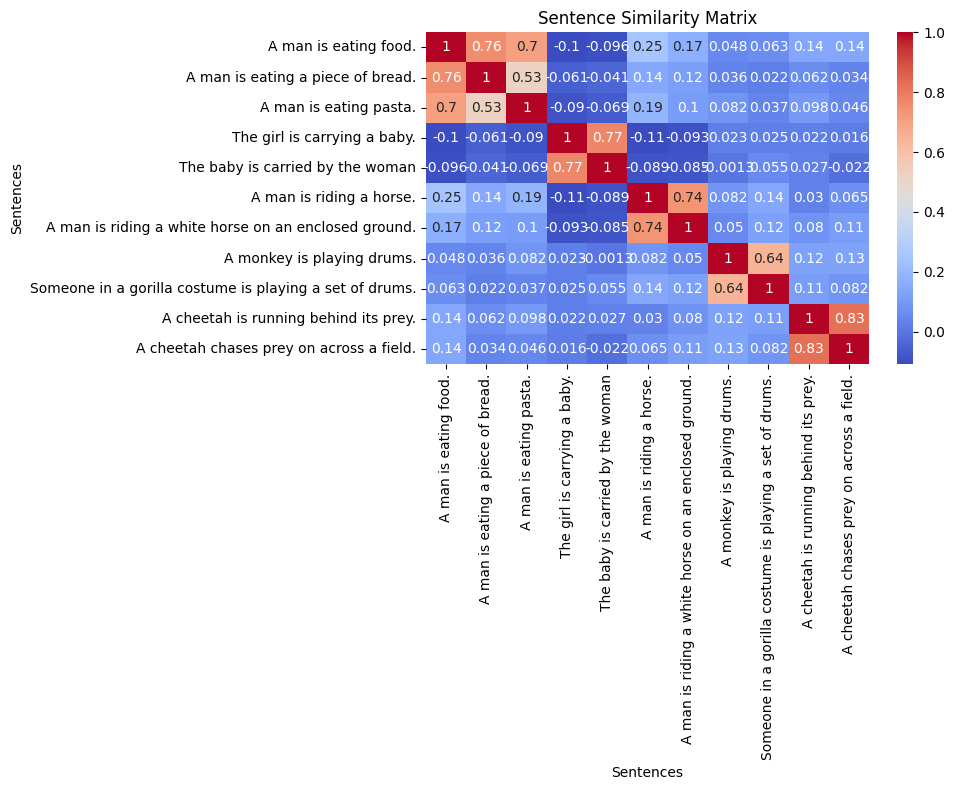

Cluster  1
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  4
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  5
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']



In [6]:
from sentence_transformers import SentenceTransformer

from sklearn.cluster import KMeans

from sentence_transformers import SentenceTransformer

# Load the pre-trained model
embedder = SentenceTransformer("all-MiniLM-L6-v2")

corpus_embeddings = embedder.encode(corpus)

similarities = embedder.similarity(corpus_embeddings, corpus_embeddings)
print(similarities[:3,:3])


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarities, annot=True, cmap="coolwarm", xticklabels=corpus, yticklabels=corpus)
plt.title("Sentence Similarity Matrix")
plt.xlabel("Sentences")
plt.ylabel("Sentences")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i + 1)
    print(cluster)
    print("")
    

Sentences were mapped to sentence embeddings and then **hierarchical clustering** is applied:

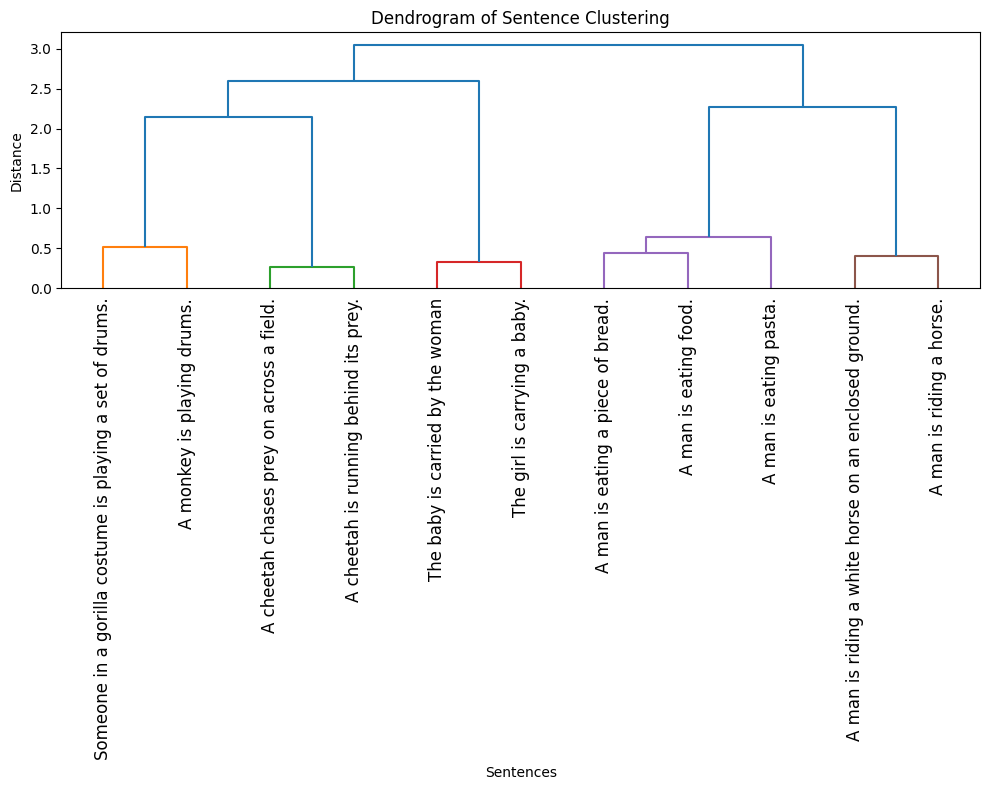

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(corpus_embeddings)

# Convert similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
linked = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, labels=corpus, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram of Sentence Clustering")
plt.xlabel("Sentences")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
